# Principal Component Analysis

References -

[https://www.youtube.com/c/Eigensteve]

[https://en.wikipedia.org/wiki/Principal_component_analysis]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Statistical interpretation of SVD

- Principal components analysis (PCA) is a popular approach for deriving a low-dimensional set of features from a large set of variables.
- PCA is a technique for reducing the dimension of a n × p data matrix X. The first principal component direction of the data is that along which the observations vary the most
- When faced with a large set of correlated variables, principal components allow us to summarize this set with a smaller number of representative variables that collectively explain most of the variability in the original set.
- hierarchical co-ordinate systems 

each row vector x is measurement from a single experiment

$X = \begin{bmatrix}
    -- && x_1 && --\\
    -- && x_2 && --\\
       &&  .\\
       &&  .
\end{bmatrix}$

- Compute mean row $\bar{x} = \frac{1}{n}{\sum_{j=0}^{n}{x_j}}$

    $\bar{X}$ average matrix

    $\begin{bmatrix}
        1\\
        1\\
        ...\\
        1
    \end{bmatrix}
    \begin{bmatrix}
        - && \bar{x} && -
    \end{bmatrix}$

- Subtract mean from data matrix $B = X - \bar{X}$ 
    - mean centered data
    - 0 mean gaussian

- Covariance matrix $C = \frac{1}{n-1}{B^T B}$

C is a Hermitian matrix.
square matrix where 
$a_{ij}=\bar{a_{ji}}$ 

In [2]:
X = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25],
])

In [3]:
X.T @ X

array([[ 855,  910,  965, 1020, 1075],
       [ 910,  970, 1030, 1090, 1150],
       [ 965, 1030, 1095, 1160, 1225],
       [1020, 1090, 1160, 1230, 1300],
       [1075, 1150, 1225, 1300, 1375]])

- First principal component $u_1 where ... {argmin\atop{||u_1|| = 1}} {u_1^T B^T B u_1}$\
    and it is eigen vector and eigen value.
   

- $C V = V D$
        V = Eigen Vectors
        D = Eigen Values

* T = BV

Decompose $B = U\Sigma V^T$

Principal component(T)
* T = $U\Sigma V^T.V$
* T = $U\Sigma$

> $B^*$ is complex conjugate of $B$. When $B$ is complex then complex conjugate is used for $B^T$

## PCA on Gaussian Distribution

In [4]:
dim = 2 # dimension on data
mu = np.array([2,1]) # mean for both dims
sigma = np.array([2, 0.5]) # deviation for both dims
n_points = 10000 # number of samples

# rotation angle
theta = np.pi/3

# rotation matrix
rotation_matrix = np.array([
    [ np.cos(theta), -np.sin(theta) ],
    [ np.sin(theta), np.cos(theta) ]
])

### Generating gaussian data

In [40]:
rndm_data = np.random.randn(dim,n_points) #(2,10000)

In [43]:
rndm_data.mean(axis=1),rndm_data.std(axis=1)

(array([-0.00030297,  0.00135284]), array([0.99519271, 0.9953129 ]))

<AxesSubplot:>

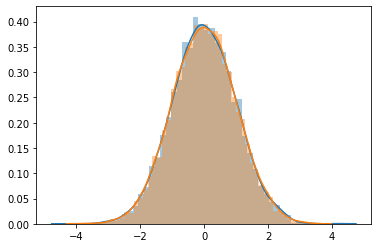

In [137]:
sns.distplot(rndm_data[0])
sns.distplot(rndm_data[1])

$G(\mu,\sigma)$ = Gaussian data with $\mu$ mean and $\sigma$ standard deviation

Changing parameters of gaussian distribution

- for 1-D data
$$G(\mu,\sigma) = \sigma * G(0,1)  + \mu$$

- for 2-D data
$$G(\mu_{1 \times 2},\sigma_{1 \times 2}) = 
\begin{bmatrix}
    \sigma_1 && 0\\
    0 && \sigma_2
\end{bmatrix}
* G(0,1)_{2 \times n} +
\begin{bmatrix}
    \mu_1 && 0\\
    0 && \mu_2
\end{bmatrix}
* \begin{bmatrix}
    1 && &&\\
    && \ddots\\
    && && 1
\end{bmatrix}_{2 \times n}
$$


for diagonal matrices it will only calculate with values of another matrix's dimension for which the data is available.

In [45]:
g_data = (np.diag(sigma) @ rndm_data) + (np.diag(mu) @ np.ones((dim,n_points)))

<AxesSubplot:>

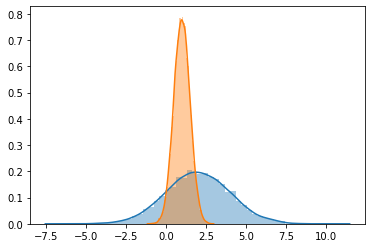

In [138]:
sns.distplot(g_data[0])
sns.distplot(g_data[1])

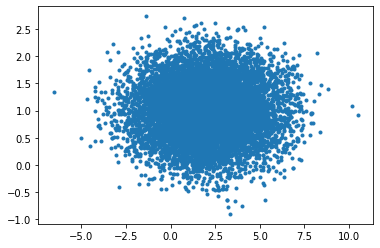

In [139]:
plt.plot(g_data[0],g_data[1],'.')

### Rotate data

In [48]:
# as it is a 2D rotation

r_data = rotation_matrix @ g_data

<AxesSubplot:>

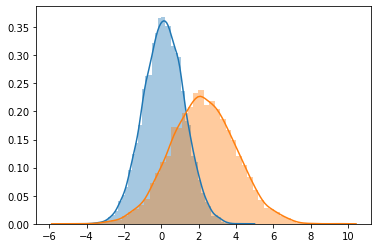

In [140]:
sns.distplot(r_data[0])
sns.distplot(r_data[1])

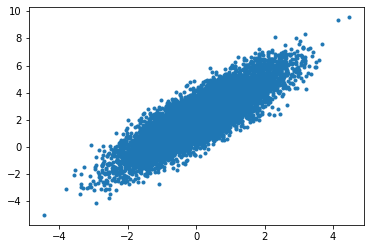

In [50]:
plt.plot(r_data[0,...],r_data[1,...],'.')

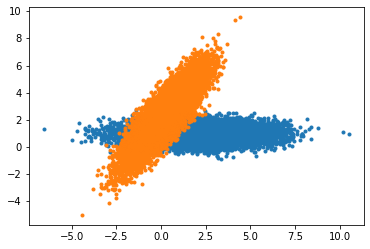

In [51]:
plt.plot(g_data[0,...],g_data[1,...],'.')
plt.plot(r_data[0,...],r_data[1,...],'.')

### Calculation

In [52]:
X = r_data

In [53]:
X.shape

(2, 10000)

In [54]:
X_avg = X.mean(axis=1)

In [56]:
# broadcast average of X to be subtracted from X
np.tile(X_avg,(n_points,1)).T

array([[0.13308583, 0.13308583, 0.13308583, ..., 0.13308583, 0.13308583,
        0.13308583],
       [2.23186425, 2.23186425, 2.23186425, ..., 2.23186425, 2.23186425,
        2.23186425]])

In [57]:
# or use this
np.diag(X_avg) @ np.ones((2,n_points))

array([[0.13308583, 0.13308583, 0.13308583, ..., 0.13308583, 0.13308583,
        0.13308583],
       [2.23186425, 2.23186425, 2.23186425, ..., 2.23186425, 2.23186425,
        2.23186425]])

#### mean data matrix

In [58]:
B = X - np.diag(X_avg) @ np.ones((2,n_points))

In [59]:
B.shape

(2, 10000)

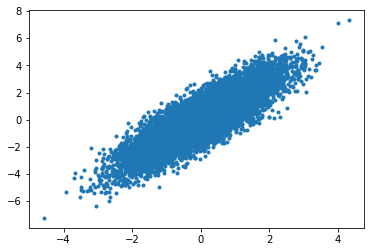

In [60]:
plt.plot(B[0],B[1],'.')

<AxesSubplot:>

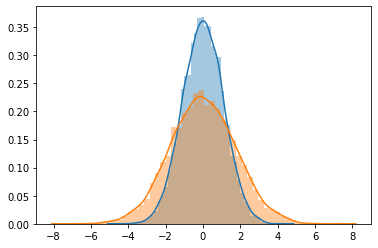

In [61]:
sns.distplot(B[0])
sns.distplot(B[1])

#### Singular Value Decomposition

decompose $B = U \Sigma V^T$

In [62]:
U,S,VT = np.linalg.svd(B/np.sqrt(n_points),full_matrices=False)

U.shape, S.shape, VT.shape

((2, 2), (2,), (2, 10000))

calculate $T = U\Sigma$

In [63]:
principal_comp = U @ np.diag(S)

principal_comp

array([[-0.99565503, -0.43091614],
       [-1.7234574 ,  0.24894368]])

In [117]:
# this is to create a list of angles to rotate the straght line into a circle
range_theta = 2 * np.pi * np.arange(0,1,0.01)

range_theta.shape

(100,)

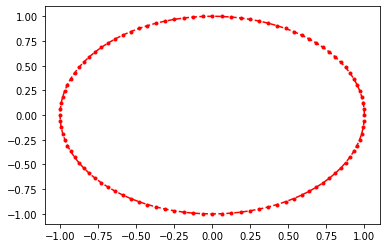

In [119]:
circle = np.array([np.cos(range_theta), np.sin(range_theta)])

plt.plot(circle[0],circle[1],'r.--')

#### Initial princial component range

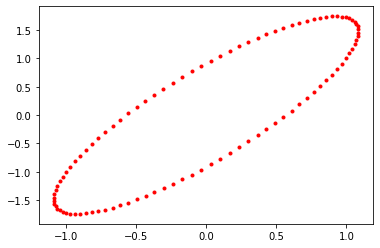

In [66]:
initial_pc_range = principal_comp @ 1 * circle

plt.plot(initial_pc_range[0],initial_pc_range[1],'r.')

#### princial components range with deviation

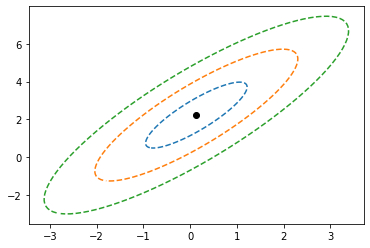

In [120]:
plt.scatter(X_avg[0],X_avg[1],c='k',marker='o') # center

# plt.plot(X[0],X[1],'.',alpha=0.4)

plt.plot(X_avg[0] + initial_pc_range[0], X_avg[1] + initial_pc_range[1],'--')
plt.plot(X_avg[0] + 2*initial_pc_range[0], X_avg[1] + 2*initial_pc_range[1],'--')
plt.plot(X_avg[0] + 3*initial_pc_range[0], X_avg[1] + 3*initial_pc_range[1],'--')

In [121]:
# first pc , second pc 
principal_comp[0,...],principal_comp[1,...]

(array([-0.99565503, -0.43091614]), array([-1.7234574 ,  0.24894368]))

#### Principal Components

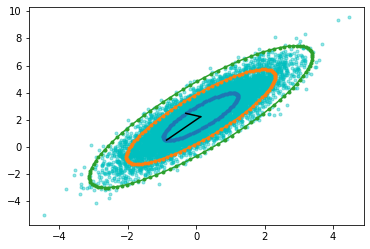

In [85]:
plt.plot(X[0],X[1],'c.',alpha=0.4)

plt.plot(X_avg[0] + initial_pc_range[0], X_avg[1] + initial_pc_range[1],'.-')
plt.plot(X_avg[0] + 2*initial_pc_range[0], X_avg[1] + 2*initial_pc_range[1],'.-')
plt.plot(X_avg[0] + 3*initial_pc_range[0], X_avg[1] + 3*initial_pc_range[1],'.-')


plt.plot([X_avg[0], X_avg[0] + principal_comp[0,0]],[X_avg[1],X_avg[1] + principal_comp[1,0]],'k')
plt.plot([X_avg[0], X_avg[0] + principal_comp[0,1]],[X_avg[1],X_avg[1] + principal_comp[1,1]],'k')

$u_1=\mu_1 + U_1 * \sigma1$

$u_2=\mu_2 + U_1 * \sigma2$

In [133]:
X_avg + (U @ np.diag(S))

array([[-0.86256921,  1.80094811],
       [-1.59037157,  2.48080793]])